In [ ]:
'''
################# 분류(classification)  #################
예측하려는 대상의 속성(설명 변수)을 입력 받고, 목표 변수가 갖고 있는 카테고리(범주형)값 중에서 어느 한 값으로 분류하여 예측한다.
고객 분류, 질병 진단, 스팸 메일 필터링, 음성 인식 등 목표 변수가 카테고리 값(범주형)을 갖는 경우에 사용한다.
KNN, SVM, Decision Tree, Logistic Regression등 
'''

'''
Logistic Regression는 종속변수(Y), 독립변수(X)간의 관계를 나타내는 예측모델이면서 목표 변수가 카테고리 값(범주형)을 갖는 경우에는 분류 분석에 해당된다
종속변수(Y)에 로릿변환을 수행 => 로지스틱 회귀 분석
로지스틱 회귀 모델은 독립변수(X) 값에 관계 없이 종속변수(Y)의 값은 0-1 사이에 있다
'''

### 로지스틱 회귀분석에 대해 알아보자
### logistic_regression.pdf 참고 

In [ ]:
'''
로지스틱 회귀 (logistic regression)
 로지스틱 회귀 (logistic regression)
 선형 또는 바이너리 분류 문제를 위한 단순하면서도 보다 강력한 분류 알고리즘
 로지스틱 회귀는 선형 분리 모델에서 훌륭하게 동작하며, 실제로 가장 많이 사용되는 분류 알고리즘 중 하나입니
다.
 p는 어떤 특정 사건이 발생할 확률입니다.
 odds ratio는 어떤 특정 사건이 일어날 확률과 그 사건이 얼어나지 않을 확률의 비로 정의됩니다
 odds ratio의 로그값을 함수값으로 가지는 함수를 정의하면…. f(p) = log(p/1-p)
 p는 0과 1사이의 수이고, f(p)의 범위는 실수 전체가 됩니다.
 순입력 함수의 리턴값을 z는 w의 값에 따라 실수 전체에 대해 매핑되는 값이며, z의 값에 따라 입력된 트레이닝 데
이터가 X가 어떤 집단에 속하는지 아닌지 결정하게 되는 값입니다.
 f(p)의 값을 z로 매핑할 수 있습니다.
 p를 z에 관한 함수로 표현하면 p = 1/1+e^-z

 함수를 그래프로 그려보면 s자 형태의 곡선으로 나타납니다. (sigmoid 함수)
 로지스틱 회귀에서는 순입력 함수의 리턴값에 대해 가중치 업데이트 여부를 결정하는 활성 함수로 sigmoid 함수
를 이용합니다.
'''

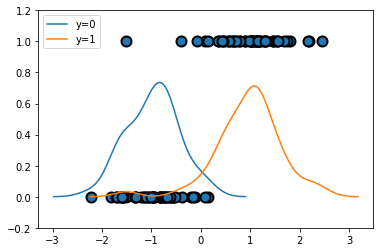

In [4]:
#statsmodel 패키지의 로지스틱 회귀 분류 분석
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
import seaborn as sns

X, y = make_classification(n_features=1, 
                           n_redundant=0,
                           n_informative=1,
                           n_clusters_per_class=1,
                           random_state=4)
plt.scatter(X,y,s=100, edgecolor='k', linewidth=2)
sns.distplot(X[y==0, :], label='y=0', hist=False)
sns.distplot(X[y==1, :], label='y=1', hist=False)

plt.ylim(-0.2, 1.2)
plt.show()

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Mar 2020   Pseudo R-squ.:                  0.7679
Time:                        11:39:47   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


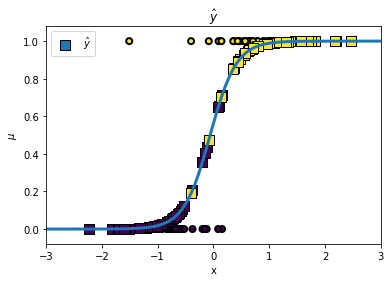

In [12]:
# statsmodel 패키지에서 베르누이 분포를 따르는 로지스틱 회귀 모델 클래스 Logit 제공 
import statsmodels.api as sm
x = sm.add_constant(X)
logit_model = sm.Logit(y, x)
logit_result = logit_model.fit(disp=0)
print(logit_result.summary()) #(4.2382x + 0.2515) #coef 확인 

import numpy as np
xx = np.linspace(-3, 3, 100)
mu = logit_result.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X, y, c=y, edgecolor="k", lw=2)
plt.scatter(X, logit_result.predict(x), label=r"$\hat{y}$", marker='s', c=y, s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$")
plt.legend()
plt.show()

In [19]:
'''
이진 분류기 훈련(page.7)
 타깃 벡터의 값이 두개
 로지스틱 회귀에서 선형 모델은 로지스틱 함수(시그모이드 함수)에 포함됩니다.
 로지스틱 함수는 함수의 출력을 0과 1 사이로 제한하는 효과가 있습니다.
 P가 0.5보다 크면 클래스 1로 예측하고 그렇지 않으면 클래스 0으로 예측합니다
'''
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터 로드
features = iris.data[:100,:] #두 개의 클래스만 선택
target = iris.target[:100]

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

logistic_regression = LogisticRegression(random_state=0) # 로지스틱 회귀 모델 생성
model = logistic_regression.fit(features_standardized, target) # 모델 훈련
new_observation = [[.5, .5, .5, .5]] # 새로운 샘플 데이터 생성
print(model.predict(new_observation)) # 클래스 예측
print(model.predict_proba(new_observation)) # 예측 확률 확인

[1]
[[0.17738424 0.82261576]]


In [20]:
'''
다중 클래스 분류기 훈련
 OVR(one-vs-rest) 로지스틱 회귀는 클래스마다 모델을 만듭니다. (다중 분류 기법)
 OVR(one-vs-rest)는 개별 모델은 샘플이 해당 클래스에 속하는지 여부를 예측합니다(이진 분류 문제)
 개별 분류 문제(클래스 0이거나 아니거나)는 독립적이라고 가정합니다
 다항 로지스틱 회귀 (multinomial logistic regression) MLR는 로지스틱 함수를 소프트맥스 함수로 바꿉니다.
 MLR은 predict_proba()를 사용해 예측한 확률을 더 신뢰할 수 있습니다(보정이 잘 되어 있습니다)
'''
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target
scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)
# OVR 로지스틱 회귀 모델을 만듭니다.
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")
model = logistic_regression.fit(features_standardized, target) # 모델 훈련

new_observation = [[.5, .5, .5, .5]] 		 # 새로운 샘플 데이터 생성
print(model.predict(new_observation))  			# 클래스 예측
print(model.predict_proba(new_observation))  

[2]
[[0.0387617  0.40669108 0.55454723]]


In [21]:
# MLR 로지스틱 회귀 모델을 만듭니다.
logistic_regression = LogisticRegression(random_state=0, multi_class="multinomial")
model = logistic_regression.fit(features_standardized, target) 	 # 모델 훈련
new_observation = [[.5, .5, .5, .5]] 		 # 새로운 샘플 데이터 생성
print(model.predict(new_observation))  		# 클래스 예측
print(model.predict_proba(new_observation))  

[1]
[[0.01982185 0.74491886 0.23525928]]


In [22]:
'''
규제로 분산 줄이기
 규제는 복잡한 모델에 패털티를 가해 분산을 줄이는 방법입니다
 규제는 최소화하려는 손실함수에 패널티 항을 추가합니다
 규제 강도를 조절하는 하이퍼파라미터 C를 사용합니다.
 LogisticRegressionCV를 사용하여 효율적으로 C 값을 튜닝할 수 있습니다. (매개변수 Cs에서 탐색할 C의 범위를 입
력할 수 있습니다.)
'''
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터를 로드
features = iris.data
target = iris.target
scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)
# 로지스틱 회귀 모델 객체 생성
logistic_regression = LogisticRegressionCV( penalty='l2', Cs=10, random_state=0, n_jobs=-1)
model = logistic_regression.fit(features_standardized, target) # 모델 훈련
logistic_regression.C_ (클래스별 )

array([21.5443469, 21.5443469, 21.5443469])

In [23]:
'''
대용량 데이터에서 분류기 훈련
 LogisticRegression에서 solver 매개변수를 확률적 평균 경사 하강법으로 지정하여 로지스틱 회귀를 학습시킵니다.
 데이터셋이 매우 클 때 확률적 평균 경사 하강법이 다른 방법보다 훨씬 빠르게 모델을 훈련할 수 있습니다.
 확률적 평균 경사 하강법은 특성의 스케일이 매우 민감하기 때문에 특성 표준화가 매우 중요합니다.
'''
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#iris는 작지만 일단 해보자 
iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target
scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)

# 로지스틱 회귀 모델 생성
logistic_regression = LogisticRegression(random_state=0, solver="sag")
model = logistic_regression.fit(features_standardized, target) # 모델 훈련
# 에러 발생
LogisticRegression(random_state=0, solver='liblinear', penalty='none').fit( features_standardized, target)
# 에러 발생
LogisticRegression(random_state=0, solver='sag', penalty='l1').fit(features_standardized, target)

ValueError: penalty='none' is not supported for the liblinear solver

In [24]:
'''
불균형한 클래스 다루기
 매우 불균형한 클래스가 있고 전처리 과정에서 처리하지 못했다면 class_weight 매개변수로 클래스에 가중치를 부
여하여 균형잡힌 클래스를 만들 수 있습니다
 balanced로 지정하면 자동으로 클래스 빈도의 역수로 가중치를 부여합니다.
'''
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

features = features[40:,:] # 처음 40개 샘플을 제거
target = target[40:] #불균형한 클래스를 만듭니다.
# 타깃 벡터에서 0이 아닌 클래스는 모두 1로 만듭니다.
target = np.where((target == 0), 0, 1)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features) # 특성을 표준화
# 로지스틱 회귀 모델 생성
logistic_regression = LogisticRegression(random_state=0, class_weight="balanced")
model = logistic_regression.fit(features_standardized, target) # 모델 훈련

In [26]:
''' 
불균형한 클래스 다루기(이어서)
 class_weight 매개변수에 {클래스_레이블:가중치} 형식의 딕셔너리를 전달할 수도 있습니다.
 class_weight="balanced"로 설정했을 때 로지스틱 모델이 계산한 클래스 가중치는 compute_class_weight()를 사용
하여 구할 수 있습니다.
'''
from sklearn.utils.class_weight import compute_class_weight
# 클래스 레이블이 0, 1인 데이터의 클래스 가중치를 계산합니다.
compute_class_weight('balanced', [0, 1], target)
# 10:1의 클래스 가중치를 부여한 로지스틱 회귀 모델을 만듭니다.
logistic_regression = LogisticRegression(random_state=0, class_weight={0:10, 1:1})
model = logistic_regression.fit(features_standardized, target) # 모델 훈련

new_observation = [[.5, .5, .5, .5]]
print(model.predict(new_observation))  		# 클래스 예측
print(model.predict_proba(new_observation))

[1]
[[6.26372887e-04 9.99373627e-01]]


In [29]:
##########################로지스틱 회귀 분류 평가###############################
# 타이타닉 데이터로부터 train-test 데이터 분리 (80:20)
#(분산을 줄이는 하이퍼파라미터 C을 구함)
# 로지스틱 회귀 모델을 사용하여 학습
#테스트 데이터에 대한 예측 결과 생성후 
# 정확도, 정밀도, 재현율 평가 결과 출력

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

raw_data = pd.read_excel('data/titanic.xls')
raw_data.info()
# pclass : 객실 등급
#survived : 생존 유무
#sex : 성별
#age : 나이
#sibsp : 형제 혹은 부부의 수
#parch : 부모, 혹은 자녀의 수
#fare : 지불한 운임
#boat : 탈출한 보트가 있다면 boat 번호 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [32]:
import pandas as pd 
import numpy as np 

train_num = int(raw_data.shape[0] * 0.8)
train_x_data = raw_data.drop("survived", axis = 1, inplace = False)[:train_num]
test_x_data = raw_data.drop("survived", axis=1, inplace=False)[train_num:]

train_y_data = raw_data["survived"][:train_num].values.reshape([-1,1])
test_y_data = raw_data["survived"][train_num:].values.reshape([-1,1])

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler

model = LogisticRegression()
myModel = model.fit(train_x_data,train_y_data)  
result = myModel.predict(test_df)
display(result)

NameError: name 'train_x_data' is not defined

In [5]:
##################강사님 코드####################
# 타이타닉 데이터로부터 train-test 데이터 분리 (80:20) 생존률 예측
# 분산을 줄이는 하이퍼파라미터 C을 구함
# 로지스틱 회귀 모델을 사용하여 학습
# 테스트 데이터에 대한 예측 결과 생성후 
# 정확도, 정밀도, 재현율 평가 결과 출력


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

raw_data = pd.read_excel('data/titanic.xls')
raw_data.info()

# pclass : 객실 등급
#survived : 생존 유무
#sex : 성별
#age : 나이
#sibsp : 형제 혹은 부부의 수
#parch : 부모, 혹은 자녀의 수
#fare : 지불한 운임
#boat : 탈출한 보트가 있다면 boat 번호 

tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('int')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()
features  = raw_data[['pclass','sex','age','sibsp','parch','fare']]
features.info()
target = raw_data[['survived']].values
 
from sklearn.linear_model import LogisticRegressionCV

scaler = StandardScaler()  		# 특성을 표준화
features_standardized = scaler.fit_transform(features )

logistic_regression = LogisticRegressionCV( penalty='l2', Cs=1000, random_state=0, n_jobs=-1)
model = logistic_regression.fit(features_standardized, target )  # 모델 훈련
logistic_regression.C_


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1045 non-null float64
survived     1045 non-null int32
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket   

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.00242876])

In [6]:
titanic = raw_data[['pclass','sex','age','sibsp','parch','fare', 'survived']]

from sklearn.model_selection import train_test_split
#test(valid)/train 을 2:8 로 randomly select
train, valid = train_test_split(titanic, test_size=0.2, random_state=0)

#train/valid set 완성! 
train_y=train['survived']
train_x=train.drop(['survived'], axis=1)

valid_y=valid['survived']
valid_x=valid.drop(['survived'],axis=1)


In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0 )
lr.fit(train_x, train_y)
pred_y = lr.predict(valid_x)

print("Misclassification samples : %d" %(valid_y != pred_y).sum())

Misclassification samples : 41


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(valid_y, pred_y))
print("Precision : %.3f" % precision_score(valid_y, pred_y))
print("Recall : %.3f" % recall_score(valid_y, pred_y))
print("F1 : %.3f" % f1_score(valid_y, pred_y))

accuracy: 0.80
Precision : 0.756
Recall : 0.728
F1 : 0.742
